In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Create a model class

class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()

    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [24]:
torch.manual_seed(32)

model = Model()

In [25]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

my_df = pd.read_csv(url)

In [26]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [27]:
# Change to numbers

my_df["variety"] = my_df["variety"].replace("Setosa", 0.0)
my_df["variety"] = my_df["variety"].replace("Versicolor", 1.0)
my_df["variety"] = my_df["variety"].replace("Virginica", 2.0)

In [28]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [29]:
X = my_df.drop("variety", axis=1)
y = my_df["variety"]

In [30]:
# conver df to numpy array

X = X.values
y = y.values

In [31]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Train, test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [34]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [35]:
# Loss Function
criterion = nn.CrossEntropyLoss()

# Chosse optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [36]:
# Training loop

epochs = 100
losses = []

for i in range(epochs):
  # 1. Get prediction
  y_pred = model.forward(X_train)

  # 2. Find losses
  loss = criterion(y_pred, y_train)

  # 3. Track losses
  losses.append(loss.detach().numpy())

  # 4. Print every 10 epochs
  if i % 10 == 0:
    print(f"Epoch: {i} and loss is {loss}")

  # 5. Back propagation
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()



Epoch: 0 and loss is 1.1699321269989014
Epoch: 10 and loss is 0.9570867419242859
Epoch: 20 and loss is 0.7980872392654419
Epoch: 30 and loss is 0.6327950954437256
Epoch: 40 and loss is 0.43861740827560425
Epoch: 50 and loss is 0.2904532551765442
Epoch: 60 and loss is 0.1778070479631424
Epoch: 70 and loss is 0.11584124714136124
Epoch: 80 and loss is 0.08936373889446259
Epoch: 90 and loss is 0.0775291696190834


Text(0.5, 1.0, 'Losses')

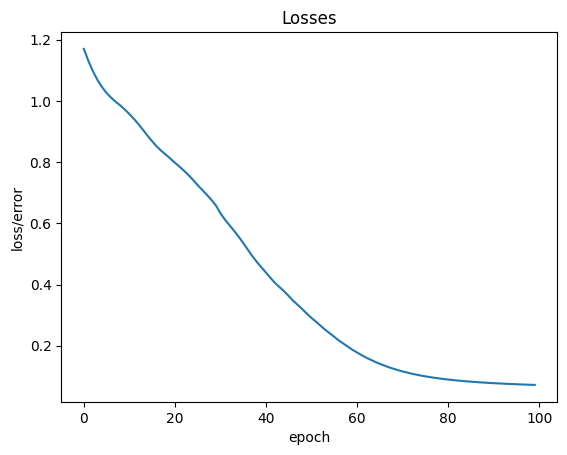

In [37]:
# Plot losses

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")
plt.title("Losses")

In [38]:
# Evaluate model

with torch.inference_mode():
  # Get preds
  y_eval = model.forward(X_test)

  # Get loss/error
  loss = criterion(y_eval, y_test)

In [39]:
loss

tensor(0.0538)

In [40]:
correct = 0

with torch.inference_mode():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f"{i+1} - {str(y_val)} \t {y_test[i]}")

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"Out model got {correct}/30")

1 - tensor([-3.3646,  3.9392,  0.3720]) 	 1
2 - tensor([  7.5572,   1.1015, -11.3347]) 	 0
3 - tensor([  6.5957,   1.5027, -10.4091]) 	 0
4 - tensor([-3.3331,  4.2594,  0.0623]) 	 1
5 - tensor([-7.3782,  2.8087,  5.1605]) 	 2
6 - tensor([-7.3760,  3.9013,  4.2826]) 	 2
7 - tensor([  6.1971,   1.6470, -10.0047]) 	 0
8 - tensor([  6.6383,   1.4348, -10.4031]) 	 0
9 - tensor([-2.6753,  4.3091, -0.6392]) 	 1
10 - tensor([  7.1875,   1.3812, -11.0965]) 	 0
11 - tensor([-3.8318,  4.4027,  0.5246]) 	 1
12 - tensor([-8.6807,  1.9994,  6.8923]) 	 2
13 - tensor([-2.0678,  3.8200, -0.7571]) 	 1
14 - tensor([-1.0768,  4.3741, -2.2838]) 	 1
15 - tensor([-7.4965,  2.6207,  5.3287]) 	 2
16 - tensor([-8.6136,  1.5508,  7.1186]) 	 2
17 - tensor([-3.7761,  3.6462,  0.9487]) 	 1
18 - tensor([-6.7608,  2.7754,  4.5281]) 	 2
19 - tensor([-1.7048,  4.1980, -1.4670]) 	 1
20 - tensor([  7.7757,   1.3740, -11.8864]) 	 0
21 - tensor([  6.8811,   1.5887, -10.8763]) 	 0
22 - tensor([-9.4350,  2.7012,  7.2406]) 	 